In [1]:
%pylab inline
from galaxy2galaxy import problems
import tensorflow as tf
Modes = tf.estimator.ModeKeys

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

/usr/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWarning: Passing (type, 1)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




In [2]:
problems.available()

['attrs2img_cosmos',
 'attrs2img_cosmos32',
 'img2img_cosmos',
 'img2img_cosmos32',
 'img2img_cosmos_hsc',
 'img2img_hsc',
 'img2img_hsc_anomaly',
 'img2photoz_hsc']

In [3]:
# Let's create an instance of the hsc_problem
cosmos_hsc = problems.problem('img2img_cosmos_hsc')

In [4]:
dset = cosmos_hsc.dataset(Modes.TRAIN, data_dir='/data2/g2g/cosmos_hsc')


INFO:tensorflow:Reading data files from /data2/g2g/cosmos_hsc/img2img_cosmos_hsc-train*
INFO:tensorflow:partition: 0 num_data_files: 80
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.



In [5]:
dset = dset.batch(25)

In [6]:
# Build an iterator over this dataset, and extract a batch
it = dset.make_one_shot_iterator().get_next()

sess = tf.Session()
batch = sess.run(it)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


In [74]:
batch = sess.run(it)

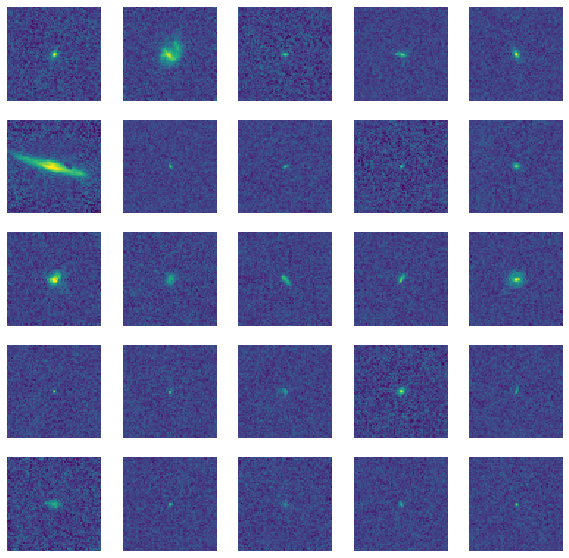

In [75]:
figure(figsize=(10,10))
for i in range(25):
    subplot(5,5,i+1)
    imshow(np.arcsinh(10*batch['inputs'][i][:,:,0]),vmax=4,vmin=-1)
    axis('off')